### 딥러닝 모델 적용 단계
1. 데이터 로딩  
2. 데이터 전처리  
3. 모델 정의 (define)  
4. 모델 컴파일 (compile)  
5. 모델 적합 (fit)  
6. 모델 평가 (evaluate)  
7. 예측하기 (predict)  
8. 모델 저장  

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

### Label Description  
0 airplane  
1 automobile  
2 bird  
3 cat  
4 deer  
5 dog  
6 frog  
7 horse  
8 ship  
9 truck  

## 1. 데이터로딩

In [2]:
np.random.seed(100)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

170508288/170498071 [==============================] - 84s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<font color=blue> (50000개, 32, 32, 3)     
32픽셀 그림   
3 >>  R, G, B  
</font>


In [3]:
for i in range(5):
    print("y_train : ", y_train[i])
    print("x_train : ", x_train[i])

y_train :  [6]
x_train :  [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
y_train :  [9]
x_train :  [[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...



[6], 

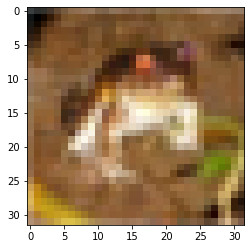

[9], 

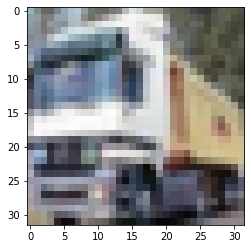

[9], 

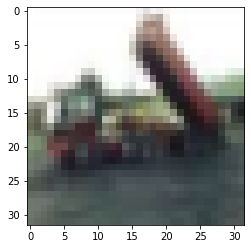

[4], 

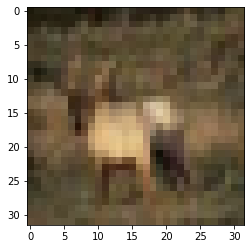

[1], 

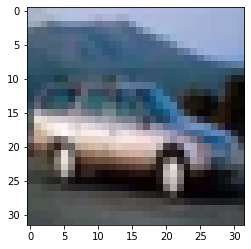

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline 

for i in range(5): 
    plt.imshow(x_train[i]) 
    print(y_train[i], end=", ") 
    plt.show()

## 2. 데이터 전처리

In [ ]:
# Resize 생략 

In [5]:
# 3차원을 1차원으로 
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

In [6]:
# Gaussian Normalization (Z-score)
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

In [7]:
# class vector를 one-hot vector로 변환
labels = 10
y_train = to_categorical(y_train, labels)
y_test = to_categorical(y_test, labels)

print("y_train : ", y_train)
print("y_test : ", y_test)

y_train :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
y_test :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# 이미지 augmentation 과정 진행여부 

## 3. 모델정의

In [10]:
model = Sequential()    #input layer 자동으로 설계됨
model.add(Dense(512, input_shape=(3072,), activation='relu', name = 'Hidden1')) 
model.add(Dense(256, activation = 'relu', name = 'Hidden2'))
model.add(Dense(512, activation = 'relu', name = 'Hidden3') )
model.add(Dense(10, activation = 'sigmoid'))    # output Layer

## 4. 모델 컴파일 

#### 손실함수(Loss function)  
**회귀 : 평균제곱오차**   
       - 연속형 변수를 예측할때 사용    
   
**분류 : 크로스 엔트로피**  
       - 이진분류 : binary_crossentropy   
       - 다중분류 : categorical_crossentropy

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 512)               1573376   
                                                                 
 Hidden2 (Dense)             (None, 256)               131328    
                                                                 
 Hidden3 (Dense)             (None, 512)               131584    
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 1,841,418
Trainable params: 1,841,418
Non-trainable params: 0
_________________________________________________________________


<font color=blue> *
- optimizer = 훈련 과정을 설정하는 옵티마이저를 설정  
- loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정  
- metrics = 훈련을 모니터링하기 위한 지표  
</font>

## 5. 모델적합(fit)

In [12]:
model.fit(x_train, y_train, batch_size = 1024, epochs=10, validation_data=(x_test, y_test), verbose = 1)

Epoch 1/10
49/49 [==============================] - 6s 88ms/step - loss: 1.7684 - accuracy: 0.3796 - val_loss: 1.5446 - val_accuracy: 0.4546
Epoch 2/10
49/49 [==============================] - 4s 77ms/step - loss: 1.4665 - accuracy: 0.4853 - val_loss: 1.4626 - val_accuracy: 0.4855
Epoch 3/10
49/49 [==============================] - 4s 78ms/step - loss: 1.3317 - accuracy: 0.5334 - val_loss: 1.4093 - val_accuracy: 0.5005
Epoch 4/10
49/49 [==============================] - 4s 79ms/step - loss: 1.2164 - accuracy: 0.5732 - val_loss: 1.3979 - val_accuracy: 0.5105
Epoch 5/10
49/49 [==============================] - 4s 78ms/step - loss: 1.1262 - accuracy: 0.6082 - val_loss: 1.3796 - val_accuracy: 0.5205
Epoch 6/10
49/49 [==============================] - 4s 78ms/step - loss: 1.0243 - accuracy: 0.6439 - val_loss: 1.3664 - val_accuracy: 0.5294
Epoch 7/10
49/49 [==============================] - 4s 79ms/step - loss: 0.9255 - accuracy: 0.6801 - val_loss: 1.4075 - val_accuracy: 0.5301
Epoch 8/10
49

<font color=blue> **verbose = 학습 중 출력되는 문구를 설정**  
- 0 : 아무 것도 출력하지 않습니다.  
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.  
- 2 : 미니 배치마다 손실 정보를 출력합니다.  
</font>

## 6. 모델평가

In [13]:
score = model.evaluate(x_test, y_test, verbose = 1)
print('loss = ', score[0], 'test accuracy(정답율): ', score[1]*100)

313/313 [==============================] - 3s 8ms/step - loss: 1.5720 - accuracy: 0.5290
loss =  1.5720325708389282 test accuracy(정답율):  52.89999842643738


## 7. 예측

In [ ]:
result_predict = model.predict_classes(x_test)
print(result_predict)

In [17]:
y_prob = model.predict(x_test, verbose=0) 
result_predict = y_prob.argmax(axis=-1)
print(result_predict)

[3 8 8 ... 5 5 7]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3, 

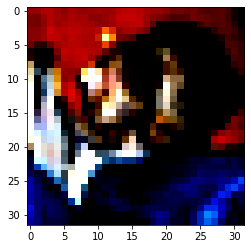

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8, 

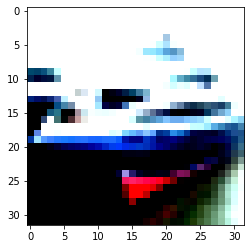

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8, 

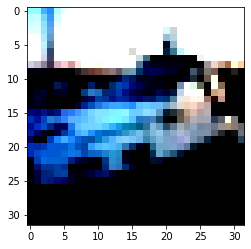

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8, 

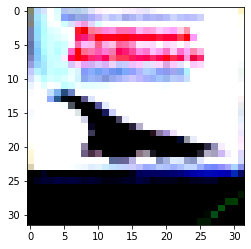

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6, 

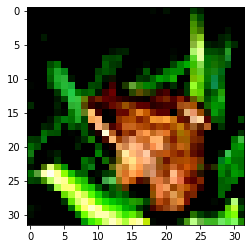

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6, 

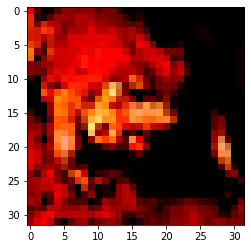

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3, 

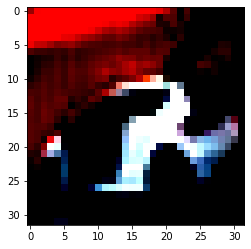

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6, 

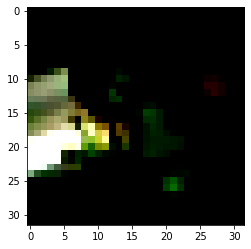

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2, 

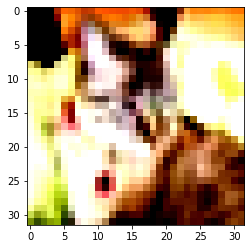

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9, 

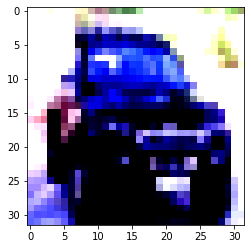

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0, 

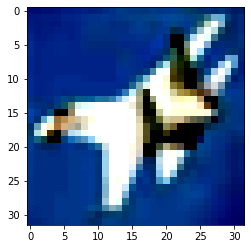

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9, 

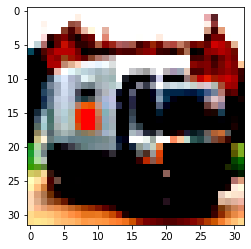

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5, 

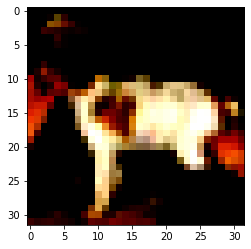

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5, 

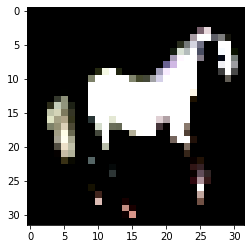

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1, 

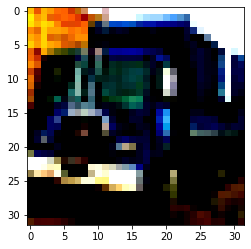

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5, 

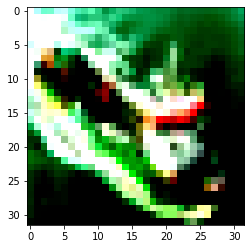

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3, 

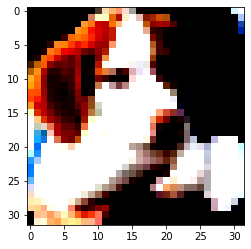

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9, 

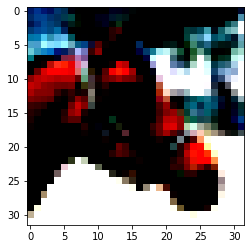

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8, 

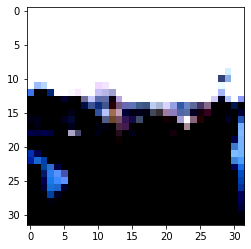

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6, 

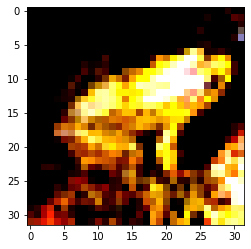

In [18]:
x_test = x_test.reshape(10000, 32, 32, 3)

for i in range(20): 
    plt.imshow(x_test[i]) 
    print(result_predict[i], end=", ") 
    plt.show()

## 8. 모델저장

In [ ]:
## 모델저장 ##

# model.save("model_name.h5")

In [ ]:
## 저장된 모델 로드 ## 

# from tensorflow.keras.models import load_model
# model = load_model("model_name.h5")